In [ ]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_excel('Customer Conversion Prediction.xlsx')

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no


### Data Cleaning



In [ ]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day               float64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.duplicated().value_counts()

False    45205
True         6
dtype: int64

In [ ]:
# df = df.drop_duplicates()

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no


In [ ]:
df['age'].dtype

dtype('float64')

In [ ]:
df['age'].unique()

array([58., 44., 33., 47., 35., 28., 42., 43., 41., 29., 53., 57., 51.,
       45., 60., 56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37.,
       50., 54., 55., 48., 24., 38., 31., 30., 27., 34., 23., 26., 61.,
       22., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64., 69.,
       72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80., 94.,
       79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88.])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


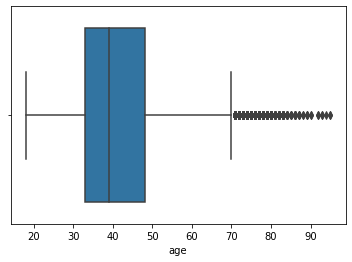

In [ ]:
sns.boxplot(df['age'])

From the chart we can see that there are some outliers. But considering the age factor there can be persons with age more than 70.

In [ ]:
data = df['age'] 
outliers=[] 
def detect_outliers(data): 
  threshold=3 
  mean=np.mean(data) 
  std=np.std(data) 
  for i in data: 
    z_score=(i-mean)/std 
    if z_score > threshold and z_score < threshold: 
      outliers.append(z_score) 
    return outliers

# outlierdetection=detect_outliers(data)

In [ ]:
detect_outliers(data)

[]

In [ ]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['job'] = df['job'].replace('admin.','admin')

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df['day'].unique()

array([ 5.,  6.,  7.,  8.,  9., 12., 13., 14., 15., 16., 19., 20., 21.,
       23., 26., 27., 28., 29., 30.,  2.,  3.,  4., 11., 17., 18., 24.,
       25.,  1., 10., 22., 31.])

In [ ]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no


In [ ]:
df.to_excel('df_cleaned.xlsx', index = False)

## Feature Engineering and EDA.

In [ ]:
df['age_bin'] = pd.cut(df['age'], [10,30,60,100], labels=['youth', 'middle_aged', 'Senior_citizen'])

In [ ]:
df['age_bin'].value_counts()

middle_aged       36993
youth              7030
Senior_citizen     1188
Name: age_bin, dtype: int64

In [ ]:
def create_stacked_bar(column_name):
    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=df['y'], columns=df[column_name], normalize='columns')
    
    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))
    
    labels = default_by_group.columns
    list1 = default_by_group.loc['no'].to_list()
    list2 = default_by_group.loc['yes'].to_list()
    
    list1_name = "Not subscribed"
    list2_name = "Subscribed"
    title = f"Subscription by {column_name}"
    xlabel = column_name
    ylabel = "Subscription percentage"
    
    fig, ax = plt.subplots(figsize=(15,10))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label=list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom=list1, label=list2_name)

    ax.set_title(title, fontweight="bold")
    ax.set_xlabel(xlabel, fontweight="bold")
    ax.set_ylabel(ylabel, fontweight="bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels, rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


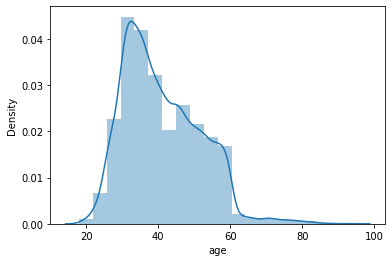

In [ ]:
sns.distplot(df.age,bins=20)

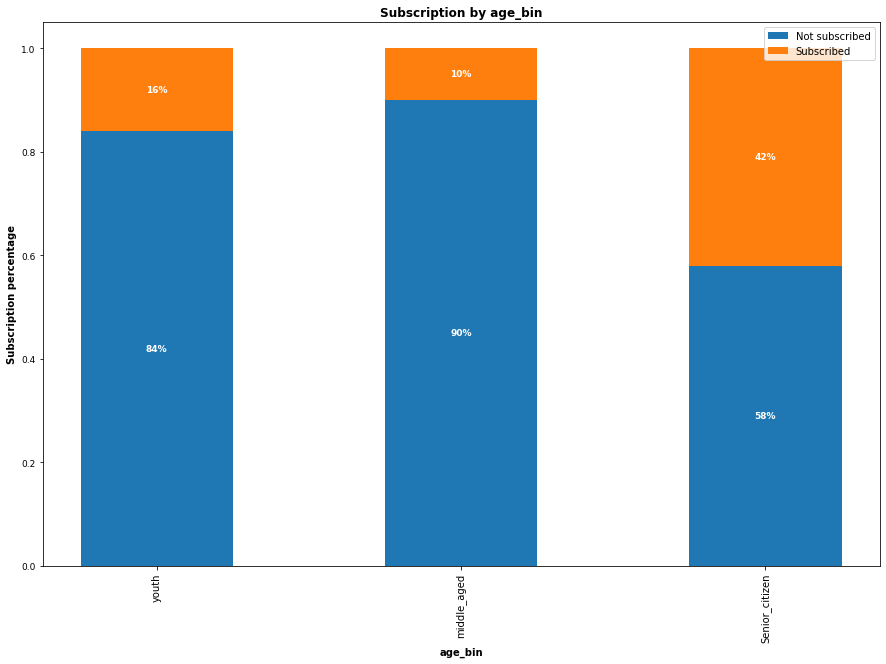

In [ ]:
create_stacked_bar('age_bin')

From the above chart we can see that in youth category 16% of them are subscribed while, in middle_aged category only 10% of them are subscribed and in Senior_citizen category 42% are subscribed. 

In [ ]:
marital_y.groupby('y')['marital'].value_counts().plot(kind = 'bar')

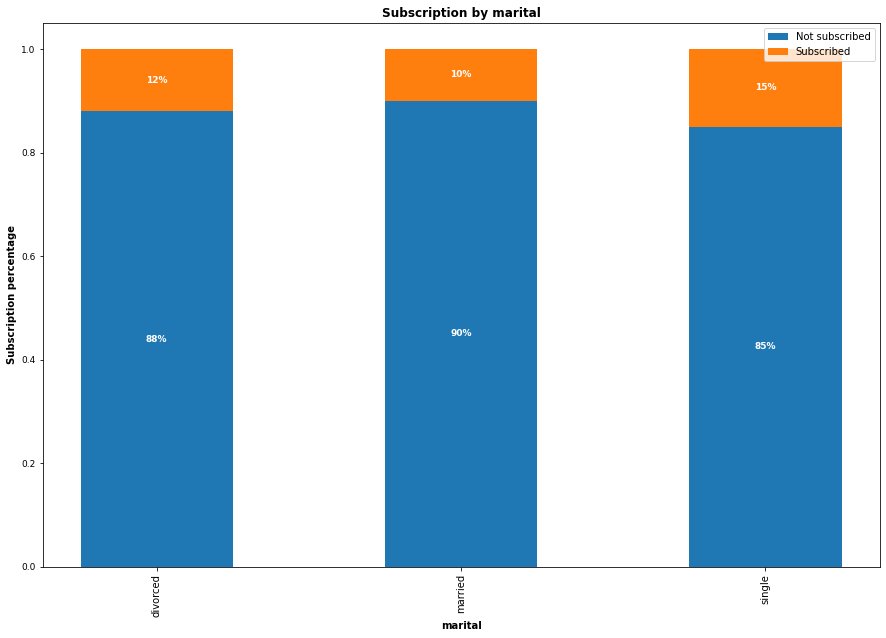

In [ ]:
create_stacked_bar('marital')

Among the three categories single category people have subscribed more.


In [ ]:
marital_y = df[df['y']=='yes']

In [ ]:
marital_N = df[df['y']=='no']

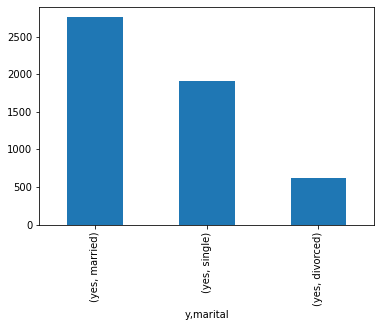

In [ ]:
marital_y.groupby('y')['marital'].value_counts().plot(kind = 'bar')

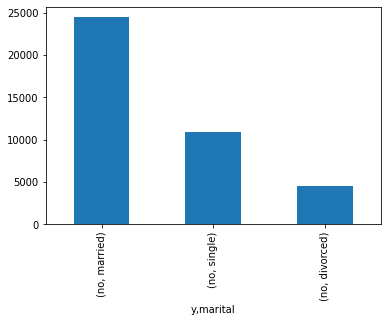

In [ ]:
marital_N.groupby('y')['marital'].value_counts().plot(kind = 'bar')

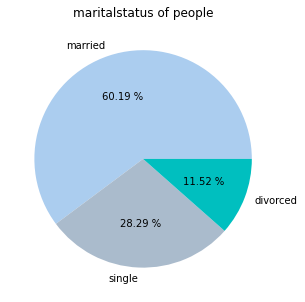

In [ ]:
married = df.loc[df['marital'] == 'married'].count()[0] 
single= df.loc[df['marital'] == 'single'].count()[0] 
divorced= df.loc[df['marital'] == 'divorced'].count()[0] 
plt.figure(figsize=(8,5)) 
labels = ['married', 'single','divorced'] 
colors = ['#abcdef', '#aabbcc','c'] 
plt.pie([married, single,divorced], labels = labels, colors=colors, autopct='%.2f %%') 
plt.title('maritalstatus of people') 
plt.show()

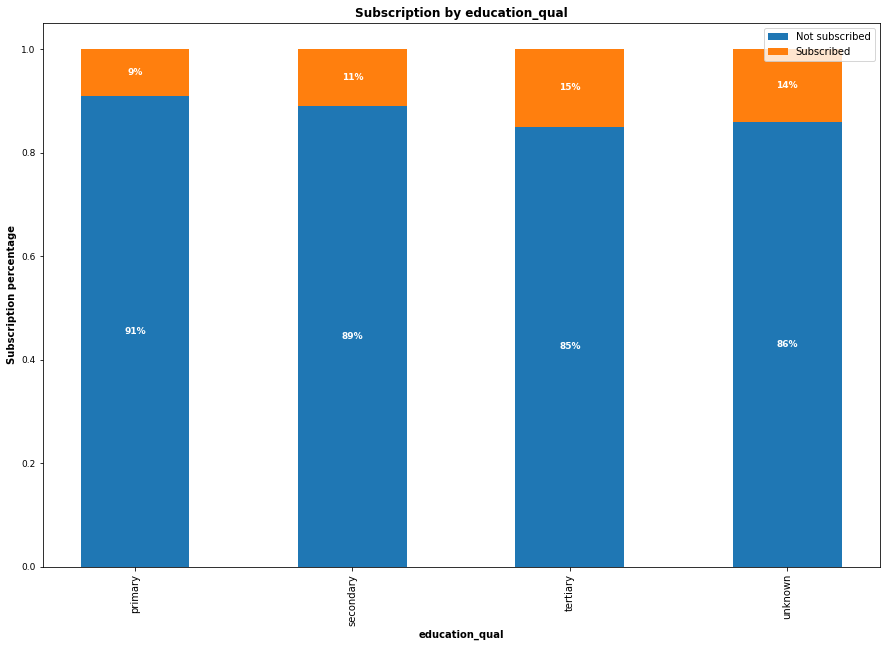

In [ ]:
create_stacked_bar('education_qual')

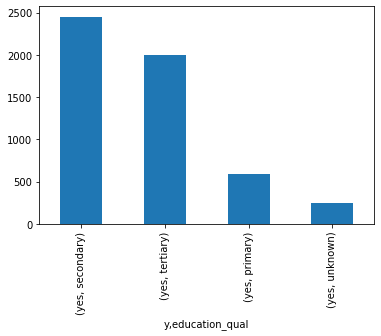

In [ ]:
marital_y.groupby('y')['education_qual'].value_counts().plot(kind = 'bar')

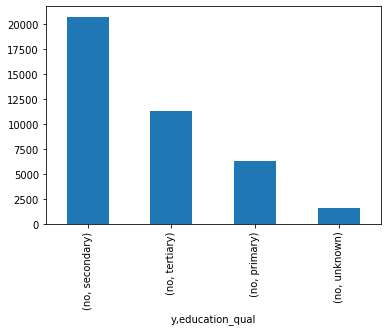

In [ ]:
marital_N.groupby('y')['education_qual'].value_counts().plot(kind = 'bar')

From the above chart we can infer that there is a steady increase in subrscription from primary to secondary to teritary. since, educated people tend to subscribe more than the others. In unknown category there can be a mix of all other categories and uneducated as well.

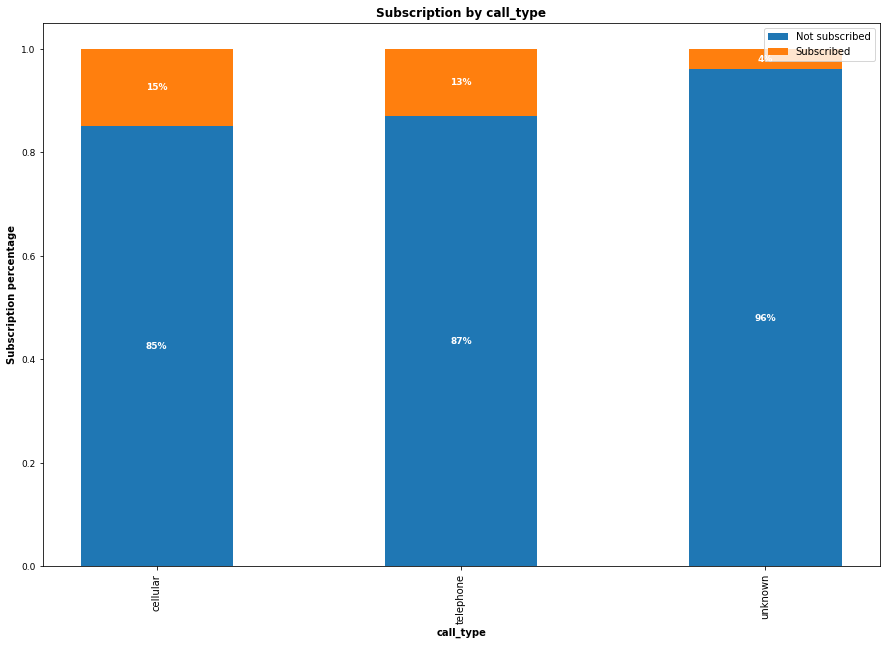

In [ ]:
create_stacked_bar('call_type')

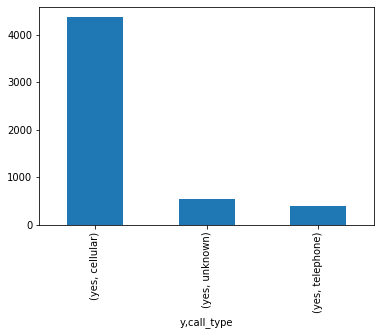

In [ ]:
marital_y.groupby('y')['call_type'].value_counts().plot(kind = 'bar')

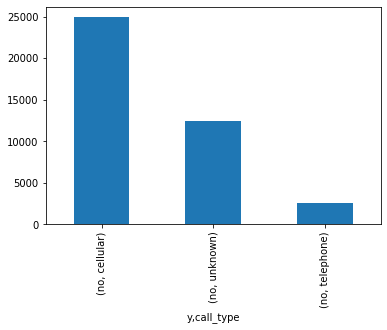

In [ ]:
marital_N.groupby('y')['call_type'].value_counts().plot(kind = 'bar')

From the above chart we can see that cellular and telephone have more chance of convertion. whereas, unknown can contain other forms of contact such as Onsite marketing, e-mail, personal references etc.,

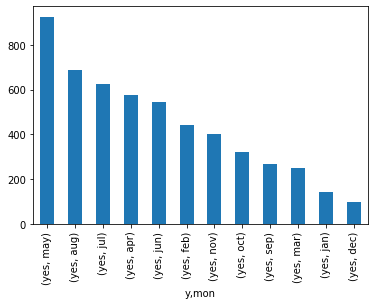

In [ ]:
marital_y.groupby('y')['mon'].value_counts().plot(kind = 'bar')

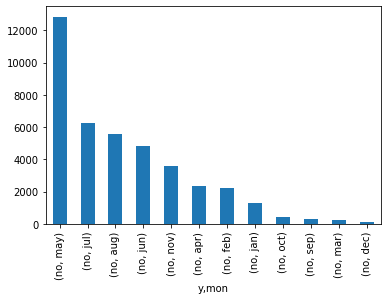

In [ ]:
marital_N.groupby('y')['mon'].value_counts().plot(kind = 'bar')

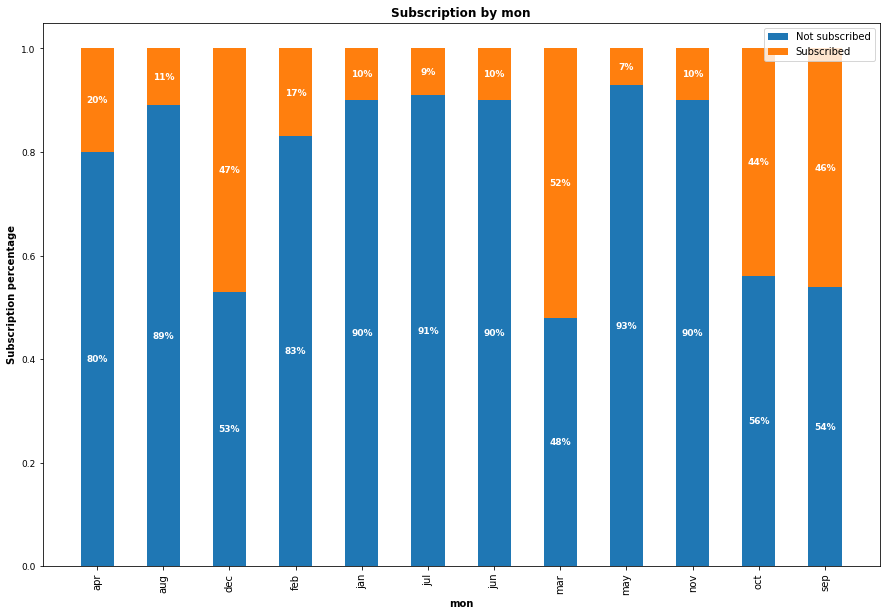

In [ ]:
create_stacked_bar('mon')

From the above chart,


*   In the month of march we can see a steady increase in subscription since, march is the end of the financial year and most people will tend to have subscription to get a deduction in tax.
*   In the month of September, October and November we can see a lot subsriptions have been made. since they are months of festivals and people tend to have subscriptions with their extra bonuses or gift to their close ones. Company may also given extra offers on the packages on these particular months.



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


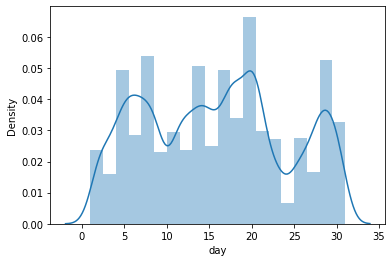

In [ ]:
sns.distplot(df.day,bins=20)

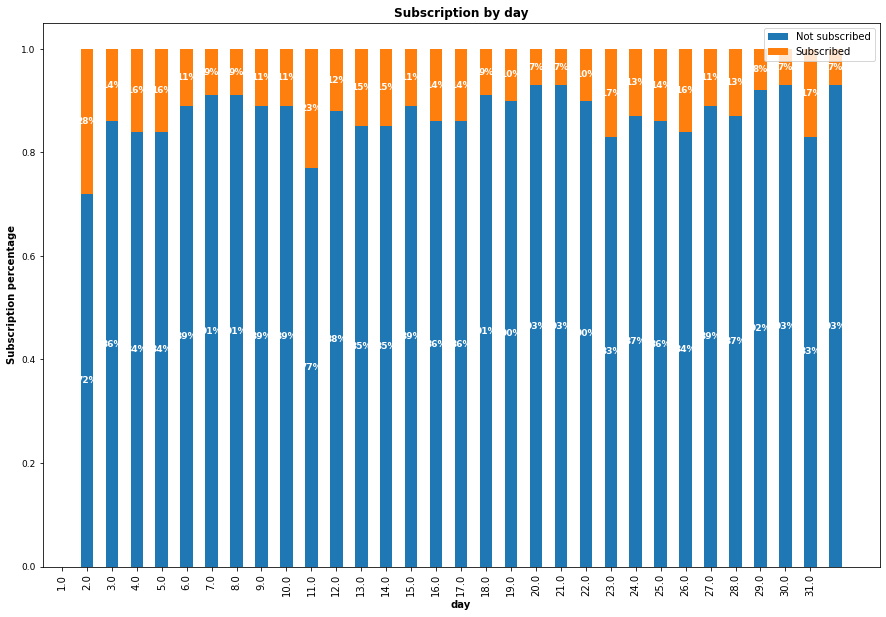

In [ ]:
create_stacked_bar('day')

In [ ]:
df.groupby('day')['y'].value_counts()

day   y  
1.0   no      232
      yes      90
2.0   no     1111
      yes     182
3.0   no      901
             ... 
29.0  yes     129
30.0  no     1295
      yes     271
31.0  no      597
      yes      46
Name: y, Length: 62, dtype: int64

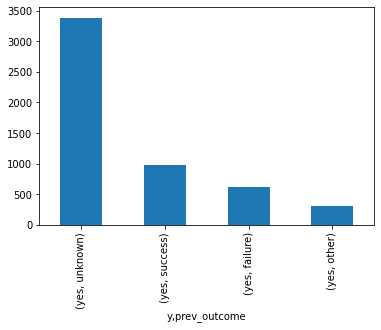

In [ ]:
marital_y.groupby('y')['prev_outcome'].value_counts().plot(kind = 'bar')

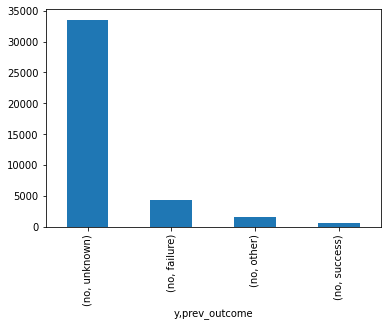

In [ ]:
marital_N.groupby('y')['prev_outcome'].value_counts().plot(kind = 'bar')

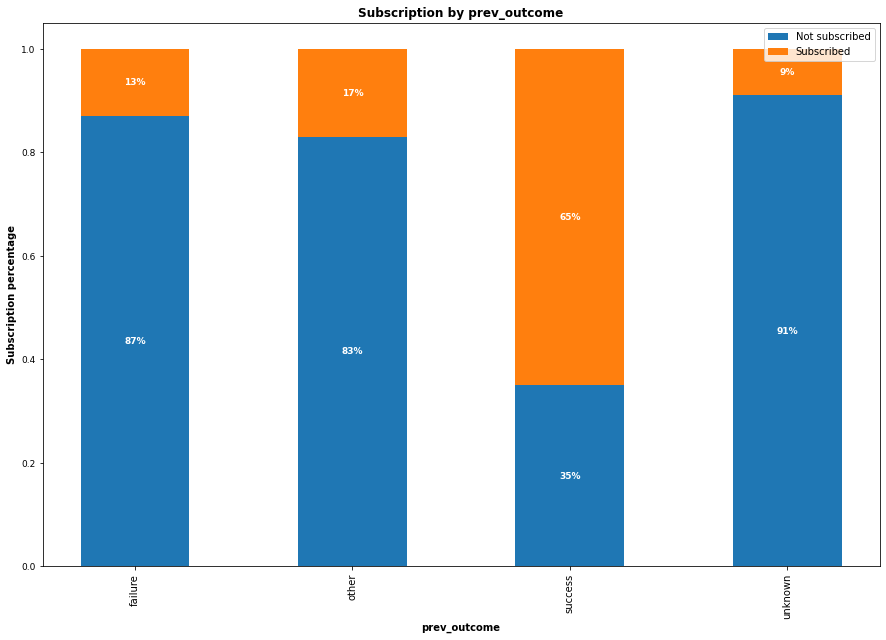

In [ ]:
create_stacked_bar('prev_outcome')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


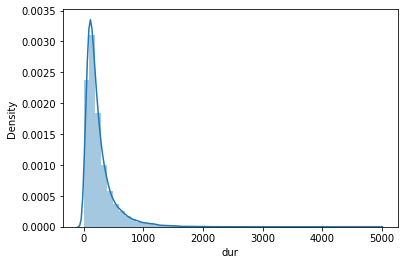

In [ ]:
# sns.boxplot(df['dur'])
# plt.xtitle = 'duration
sns.distplot(df['dur'])

In [ ]:
df['dur'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
x = [i//60 for i in df['dur']]

In [ ]:
x = pd.Series(x)

In [ ]:
x.describe()

count    45211.00000
mean         3.81739
std          4.29427
min          0.00000
25%          1.00000
50%          3.00000
75%          5.00000
max         81.00000
dtype: float64

In [ ]:
df['dur_min'] = x

In [ ]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,age_bin,dur_min
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no,middle_aged,4.0
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no,middle_aged,2.0
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no,middle_aged,1.0
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no,middle_aged,1.0
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no,middle_aged,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,technician,married,tertiary,cellular,17.0,nov,977.0,3.0,unknown,yes,middle_aged,16.0
45207,71.0,retired,divorced,primary,cellular,17.0,nov,456.0,2.0,unknown,yes,Senior_citizen,7.0
45208,72.0,retired,married,secondary,cellular,17.0,nov,1127.0,5.0,success,yes,Senior_citizen,18.0
45209,57.0,blue-collar,married,secondary,telephone,17.0,nov,508.0,4.0,unknown,no,middle_aged,8.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


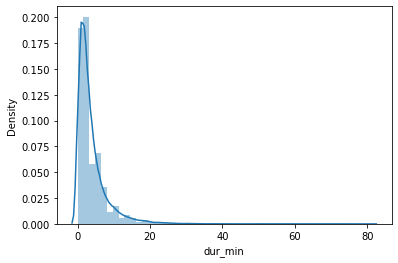

In [ ]:
sns.distplot(df['dur_min'])

In [ ]:
df['dur_min'].isnull().sum()

0

In [ ]:
# df['dur_bin'] = pd.cut(df['dur_min'], [0,5,10,100], labels=['low', 'medium', 'high'])

In [ ]:
# create_stacked_bar('dur_bin')

In [ ]:
df['dur_min'].describe()

count    45211.00000
mean         3.81739
std          4.29427
min          0.00000
25%          1.00000
50%          3.00000
75%          5.00000
max         81.00000
Name: dur_min, dtype: float64

In [ ]:
df['num_calls'].value_counts()

1.0     17544
2.0     12505
3.0      5521
4.0      3522
5.0      1764
6.0      1291
7.0       735
8.0       540
9.0       327
10.0      266
11.0      201
12.0      155
13.0      133
14.0       93
15.0       84
16.0       79
17.0       69
18.0       51
19.0       44
20.0       43
21.0       35
22.0       23
25.0       22
23.0       22
24.0       20
29.0       16
28.0       16
26.0       13
31.0       12
27.0       10
32.0        9
30.0        8
33.0        6
34.0        5
36.0        4
35.0        4
43.0        3
38.0        3
37.0        2
50.0        2
41.0        2
46.0        1
58.0        1
55.0        1
63.0        1
51.0        1
39.0        1
44.0        1
Name: num_calls, dtype: int64

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
age_bin           0
dur_min           0
dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'age_bin', 'dur_min'],
      dtype='object')

In [ ]:
# df['dur_bin'].value_counts()

Job - nominal
marital - nominal
education_qual -  nominal
call_type - nominal


In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
# df['dur_bin'].unique()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon','prev_outcome','age_bin'])

In [ ]:
df_encoded.drop(columns = ['age','dur'], inplace = True)

In [ ]:
df_encoded.head(10)

,day,num_calls,y,dur_min,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,age_bin_youth,age_bin_middle_aged,age_bin_Senior_citizen
0,5.0,1.0,no,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5.0,1.0,no,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,5.0,1.0,no,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5.0,1.0,no,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5.0,1.0,no,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,5.0,1.0,no,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
6,5.0,1.0,no,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
7,5.0,1.0,no,6.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,5.0,1.0,no,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
9,5.0,1.0,no,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_encoded['y'] = df_encoded['y'].replace({'no':0,'yes':1})

In [ ]:
df_encoded.head(10)

,day,num_calls,y,dur_min,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown,age_bin_youth,age_bin_middle_aged,age_bin_Senior_citizen
0,5.0,1.0,0,4.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,5.0,1.0,0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,5.0,1.0,0,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,5.0,1.0,0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,5.0,1.0,0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,5.0,1.0,0,2.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
6,5.0,1.0,0,3.0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
7,5.0,1.0,0,6.0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,5.0,1.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
9,5.0,1.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
df_encoded.to_excel('df_encoded.xlsx', index = False)

### Hypothesis test for day (T-Test)
Null Hypothesis: day has NO impact on Subscription

Alternate Hypothesis: day has impact on Subscription

Significance level: 0.05

In [ ]:

day_no = df.loc[df['y']=='no','day']
day_yes = df.loc[df['y']=='yes','day']
print(np.mean(day_no), np.mean(day_yes))

import scipy.stats as ss

ss.ttest_ind_from_stats(mean1=np.mean(day_no), std1=np.std(day_no), nobs1=len(day_no),
                        mean2=np.mean(day_yes), std2=np.std(day_yes), nobs2=len(day_yes))

target = df['y']
features = df.drop('y', axis=1)
train_y, test_y, train_x, test_x = train_test_split(target, features, test_size=0.2)

accuracy={}
modellr = LogisticRegression()
modellr.fit(train_x, train_y)

train_pred_lr = modellr.predict(train_x)
test_pred_lr = modellr.predict(test_x)

print(classification_report(train_pred_lr, train_y))
print('\nAccuracy Score for Logistic Regression Model (training): ', round(accuracy_score(train_pred_lr, train_y), 2))

print(classification_report(test_pred_lr, test_y))
print('\nAccuracy Score for Logistic Regression Model (testing): ', round(accuracy_score(test_pred_lr, test_y),2))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, modellr.predict(test_x))
sns.heatmap(ConfMatrix, annot=True, cmap="Pastel1_r", fmt="d", 
            xticklabels = ['Yes', 'No'], 
            yticklabels = ['No', 'Yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Logistic Regression")


param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}
dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
dt.fit( train_x, train_y )
round(dt.best_score_,2)
dt.best_params_
dt_tree = DecisionTreeClassifier( max_depth = 3, max_features=4, criterion='gini' )
dt_tree.fit(train_x, train_y)
train_pred_dt = dt_tree.predict(train_x)
test_pred_dt = dt_tree.predict(test_x)
print(metrics.classification_report(train_y, train_pred_dt))
print('\nAccuracy Score for Decission Tree Model(training): ', round(accuracy_score(train_pred_dt, train_y),2))

print(metrics.classification_report(test_y, test_pred_dt))
print('\nAccuracy Score for Decission Tree Model(testing): ', round(accuracy_score(test_pred_dt, test_y),2))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, dt_tree.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="BuGn", fmt="d", 
            xticklabels = ['Yes', 'No'], 
            yticklabels = ['Yes', 'No'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Decission Tree")

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_depth = 10, max_features=4, n_jobs=-1)
rf_clf.fit( train_x, train_y )
train_pred_RF=rf_clf.predict(train_x)
test_pred_RF=rf_clf.predict(test_x)
print(metrics.classification_report(train_y, train_pred_RF))
print('\nAccuracy Score for Random Forest Model(training): ', round(accuracy_score(train_pred_RF, train_y),2))

print(metrics.classification_report(test_y, test_pred_RF))
print('\nAccuracy Score for Random Forest Model(testing): ', round(accuracy_score(test_pred_RF, test_y),2))
plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, rf_clf.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="CMRmap", fmt="d", 
            xticklabels = ['Yes', 'No'], 
            yticklabels = ['Yes', 'No'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Decission Tree")


xgb_clf = XGBClassifier()
xgb_clf.fit(train_x, train_y)

train_pred_xgb=xgb_clf.predict(train_x)
test_pred_xgb=xgb_clf.predict(test_x)

print(metrics.classification_report(train_y, train_pred_xgb))
print('\nAccuracy Score for model6(training): ', round(accuracy_score(train_pred_xgb, train_y),2))

print(metrics.classification_report(test_y, test_pred_xgb))
print('\nAccuracy Score for model6(testing): ', round(accuracy_score(test_pred_xgb, test_y),2))

plt.figure(figsize=(4,3))
ConfMatrix = confusion_matrix(test_y, xgb_clf.predict(test_x))
sns.heatmap(ConfMatrix,annot=True, cmap="Oranges_r", fmt="d", 
            xticklabels = ['Yes', 'No'], 
            yticklabels = ['Yes', 'No'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Confusion Matrix for Decission Tree")